In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering as AC
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import ward,fcluster,is_valid_linkage
import seaborn as sns; sns.set(color_codes=True)


#entire data with genes, compounds and Jacc similairty scores
data = pd.read_csv("/home/jovyan/PEP_Lev1/Score.csv", sep = ',',usecols = range(0,4))

# #compounds in pathways related to B-12 deficiency ::: 
# cobal = pd.read_csv('/home/jovyan/PEP_Lev1/R-HSA-3296482.tsv', sep = '\t', usecols = ['MoleculeName'])
# comps = cobal['MoleculeName'].str.split(n=1, expand = True)

# comps.columns = ['chebi_compounds', 'Chebi_ID'] #132 comps 

# #select data related to B-12 deficiency:::
# cobal_comps= data[data['Chebi_Compound'].isin(comps['chebi_compounds'])]

# # # heart_comps.to_csv("/home/jovyan/PEP_Lev1/heart_comps.csv",sep = ',',index = False,header = True)
# cobal_comps["Jaccard_Distance"] = 1- cobal_comps["Jaccard_score"]
# cobal_comps.columns = ["Gene_symbols","Jaccard_Similarity","Weighted_score","Chebi_Compounds","Jaccard_Distance"]

# # #SUBSET DATA:::
# cobal_sub = cobal_comps[["Gene_symbols","Chebi_Compounds","Jaccard_Distance"]].copy()  
# # symbols = heart_sub[["Gene_symbols"]].values.tolist()
# data_matrix = cobal_sub.pivot_table(index=['Gene_symbols'],values = ['Jaccard_Distance'],columns=['Chebi_Compounds'],aggfunc=sum,fill_value=0.0)

# #Clustering :::
# symbls = data_matrix.index
# C= hc.linkage(data_matrix, method = 'ward')
# fig = plt.figure(figsize=(20,10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Gene_symbol')
# plt.ylabel('distance')
# hc.dendrogram(
#     C,
#     p= 6,
#     truncate_mode = 'level',
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8,  # font size for the x axis labels,p=5,truncate_mode='level'
#     labels = symbls,
#     orientation='top'
# )
# plt.show()


# hc.leaves_list(C)
# lev1genes = [symbls[x] for x in hc.leaves_list(C)[1:100]] 
# lev1genes 

# # Heatmap Dendogram :::
# sns.set(font_scale = .8)
# g = sns.clustermap(data_matrix,method = 'ward',metric = 'euclidean',cmap ='mako',figsize = (10,10))



In [ ]:
# this matrix contains, gene symbols & chebi compounds with JACCARD DISTANCE of pathways related to HEART
heart = pd.read_csv('/home/jovyan/PEP_Lev1/R-HSA-500792.tsv', sep = '\t', usecols = ['MoleculeName'])
compds = heart['MoleculeName'].str.split(n=1, expand = True)
# print(comps.shape)
compds.columns = ['chebi_compounds', 'Chebi_ID'] #132 comps 
compds.iloc[130,0]= 'chondroitin sulfate'  # value correction
compds.iloc[130,1]= '[ChEBI:37397]'

# #select data related to heart from full df
heart_compds= data[data['Chebi_Compound'].isin(compds['chebi_compounds'])]

# # heart_comps.to_csv("/home/jovyan/PEP_Lev1/heart_comps.csv",sep = ',',index = False,header = True)
heart_compds["Jaccard_Distance"] = 1- heart_compds["Jaccard_score"]
heart_compds.columns = ["Gene_symbols","Jaccard_Similarity","Weighted_score","Chebi_Compounds","Jaccard_Distance"]

# #SUBSET DATA:::
heart_sub = heart_compds[["Gene_symbols","Chebi_Compounds","Jaccard_Distance"]].copy()  
# symbols = heart_sub[["Gene_symbols"]].values.tolist()
heart_matrix = heart_sub.pivot_table(index=['Gene_symbols'],values = ['Jaccard_Distance'],columns=['Chebi_Compounds'],aggfunc=sum,fill_value=0.0)
# print(data_matrix.shape)
symbls = heart_matrix.index

# H= hc.linkage(heart_matrix, method = 'ward')
# fig = plt.figure(figsize=(20,10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Gene_symbol')
# plt.ylabel('Dissimilarity')
# hc.dendrogram(
#     H,
#     p= 5,
#     truncate_mode = 'level',
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8,  # font size for the x axis labels,p=5,truncate_mode='level'
#     labels = symbls,
#     orientation='top'
# )
# plt.show()
# hc.leaves_list(H)#[0:119]
# lev1genes = [symbls[x] for x in hc.leaves_list(H)] 
# # print(lev1genes)

# sns.set(font_scale = .8)
# g = sns.clustermap(heart_matrix,method = 'ward',metric = 'euclidean',cmap ='RdYlBu_r',figsize = (10,10))


#NEXT :::
#trace back to compounds and pathways !!!!

In [ ]:
# read Genes pathways and Chebi Pathways
import pandas as pd

paths = pd.read_csv("/home/jovyan/PEP_Lev1/NCBI2Reactometrim.txt", sep = '\t',usecols = ['NCBI_Gene_ID','PathwayName'])
# print(paths.shape)
# print(paths)
# paths['GeneID'].astype('int64').dtypes

info = pd.read_csv("/home/jovyan/PEP_Lev1/gene_info.csv", sep = ',',usecols = ['GeneID','Symbol'])
info.columns = ['NCBI_Gene_ID','Symbol']
# print(info.shape)

gp = info.merge(paths, how = 'left', on = 'NCBI_Gene_ID')
# print(gp)
# info['GeneID']= info['GeneID'].astype('object')


In [ ]:
#printing the list of genes & compounds
cobal_paths = gp[gp['Symbol'].isin(cobal_sub['Gene_symbols'])]
heart_paths = gp[gp['Symbol'].isin(heart_sub['Gene_symbols'])]
lt = heart_sub['Jaccard_Distance']>=0.8
lis = heart_sub[lt]
x = lis['Gene_symbols'].drop_duplicates()
# print(x.shape)

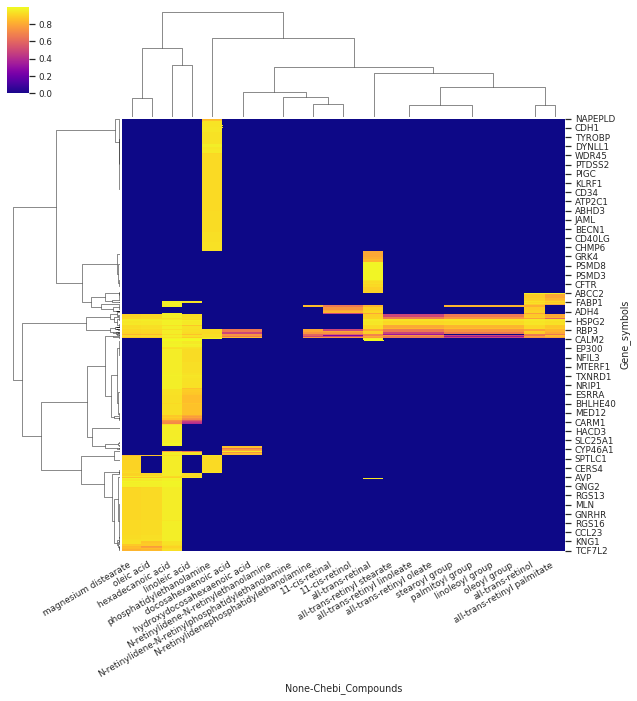

<Figure size 432x288 with 0 Axes>

None


In [81]:
# Associations for The canonical retinoid cycle in rods (twilight vision)[part of Visual Phototransduction]
retinal_df = pd.read_csv("/home/jovyan/PEP_Lev1/Participating Molecules [R-HSA-2187338].tsv",sep = '\t',usecols=['MoleculeName'])
retinal_comps = retinal_df[0:22]
retinol = retinal_comps['MoleculeName'].str.split(',', n=1, expand = True)
# print(retinol)
retinol.columns = ['Chebi_Compound','ChEBI IDs']
# print(retinol)
retinal = pd.merge(data,retinol, on = 'Chebi_Compound')
retinal['ChEBI IDs'] = retinal['ChEBI IDs'].str.upper()
# print(retinal)

retinal["Jaccard_Distance"] = 1- retinal["Jaccard_score"]
retinal.columns = ["Gene_symbols","Jaccard_Similarity","Weighted_Jaccard_Similarity","Chebi_Compounds","ChEBI IDs","Jaccard_Distance"]
# print(retinal)
retinal_matrix = retinal.pivot_table(index=['Gene_symbols'],values = ['Jaccard_Distance'],columns=['Chebi_Compounds'],aggfunc=sum,fill_value=0.0)
# print(retinal_matrix.shape)

# ::: CLUSTERING :::
symbls = retinal_matrix.index
# R = hc.linkage(retinal_matrix, method = 'ward')
# fig = plt.figure(figsize=(20,10))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Gene_symbol')
# plt.ylabel('distance')
# hc.dendrogram(
#     R,
#     p= 6,
#     truncate_mode = 'level',
#     leaf_rotation=90.,  # rotates the x axis labels
#     leaf_font_size=8,  # font size for the x axis labels,p=5,truncate_mode='level'
#     labels = symbls,
#     orientation='top'
# )
# plt.show()


# hc.leaves_list(R)
# lev1genes = [symbls[x] for x in hc.leaves_list(R)] 
# lev1genes 

# Heatmap Dendogram :::
sns.set(font_scale = .8)


g = sns.clustermap(retinal_matrix,
                   method = 'ward',
                   metric = 'euclidean',
                   cmap ='plasma',
                   xticklabels=[x[1] for x in retinal_matrix.columns],
                   figsize = (10,10)
)

plt.setp(g.ax_heatmap.get_xticklabels(), ha='right', rotation= 30)# angle the x axis labels
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation= 0)# angle the y axis labels
# plt.setp(g.ax.heatmap.invert_axes())
#plt.plot(range(10),range(10), "o")
f=plt.figure()

plt.show(g)
print(f.savefig("/home/jovyan/PEP_Lev1/retinal.pdf"))




In [ ]:
nutri = pd.read_csv("/home/jovyan/PEP_Lev1/chebi2ndb.csv",sep = ',',usecols = ['ChEBI IDs','NDB Name'])
gene_chebi = pd.read_csv("/home/jovyan/PEP_Lev1/geneSYM_JS.csv",sep = ',',usecols=['chebi_id'])
gene_chebi['chebi_id'] = gene_chebi['chebi_id'].str.upper()
gene_chebi.columns= ['ChEBI IDs']
total = pd.merge(gene_chebi,nutri, on = 'ChEBI IDs')
# print(len(set(total['ChEBI IDs'])))
retinal_sub = retinal[['Gene_symbols','ChEBI IDs','Chebi_Compounds']].copy()
Final = pd.merge(total,retinal_sub, on = 'ChEBI IDs')
# print(set(retinal_sub['ChEBI IDs']))


# print(Final.head)

In [118]:
Final.to_csv('final.csv',index=False )